#Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Importing the dataset

In [2]:
dataset = pd.read_csv("/content/drive/MyDrive/Machine Learning A - Z/Part 4 - Clustering/Clustering Summative Project/dataset/segmentation data.csv")
X = dataset.iloc[:, 1:8].values

In [3]:
dataset.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


# Make sure that there is no null value in the dataset

In [4]:
dataset.isnull().values.any()

False

In [5]:
print(X)

[[     0      0     67 ... 124670      1      2]
 [     1      1     22 ... 150773      1      2]
 [     0      0     49 ...  89210      0      0]
 ...
 [     0      0     31 ...  86400      0      0]
 [     1      1     24 ...  97968      0      0]
 [     0      0     25 ...  68416      0      0]]


# Data Preprocessing

# Find the optimal number of clusters using the Elbow method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

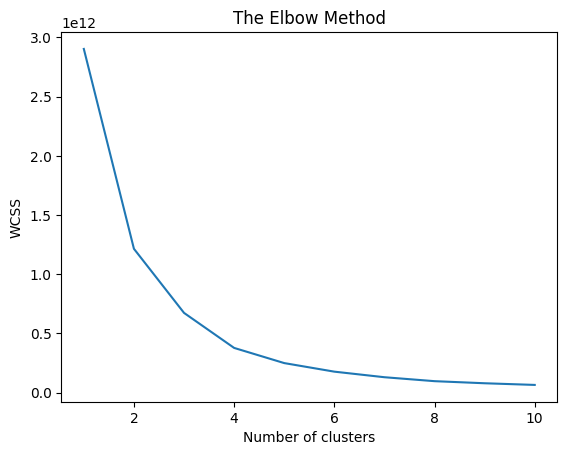

In [6]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++')
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

From the figure shown above, and by the Elbow method, we can conclude that the optimal number of clusters for K-Means Clustering on this dataset is 4

# Train the K-Means model on the dataset with 4 clusters

In [7]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++')
y_pred = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [8]:
print(y_pred)

[1 3 2 ... 2 1 2]


In [9]:
print(len(y_pred))

2000


# Visualizing the clusters using Principal Component Analysis


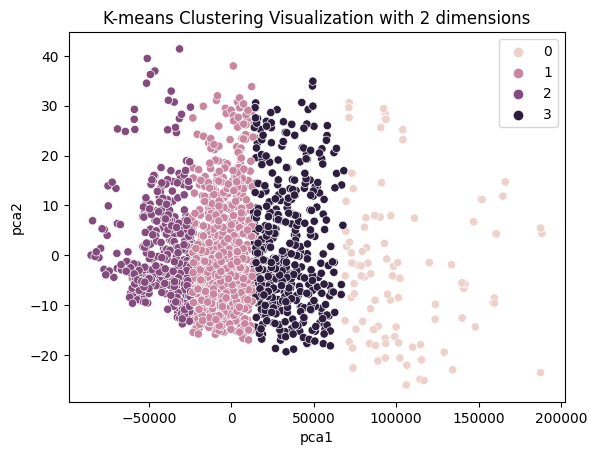

In [10]:
from sklearn.decomposition import PCA
import seaborn as sns

pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(X)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=y_pred, data=results)
plt.title('K-means Clustering Visualization with 2 dimensions')
plt.show()